# Redes neuronales convolucionales

## Importamos las librerias


In [1]:
 import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision #paquete dedicado a la producción de algoritmos de vision por computadora
import tarfile #manejo de archivos tar
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

import matplotlib.pyplot as plt

En el siguiente tutorial, vamos a diseñar y entrenar una red neuronal convolucional, con el data set CIFAR10, para la identificación de 10 tipos de objetos.

<img src="https://miro.medium.com/max/709/1*LyV7_xga4jUHdx4_jHk1PQ.png" style="max-width:80px">



## Exploración de los datos

Como primer paso en **cualquier proyecto de machine learning** se debe comenzar por examinar **qué tipo de datos** estamos tabajando, entonces como primer paso para un proyecto de ML tenemos que visualizar los elementos con los cuales vamos a trabajar.

Dentro de la págiga de **fast.ai** se encuentran albergados varios [datasets](http://files.fast.ai/data) con los cuales entrenar diversos modelos. Uno de esos datasets es CIFAR10.


Descargamos el dataset

In [2]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

Extraemos el dataset, que esta comprimido en un formato tgz

In [3]:
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

Al extraer el archivo vemos que existen dos carpetas en la direccion './data/cifar10', las cuales son: _test_ que contiene 10000 imágenes y *train* que contiene 50000. Para observar la lista de folderes y clases hacemos uso de la paqueteria **os** la cual nos permite manejar nuestras carpetas como si estuivieramos trabajando con la **terminal**

In [4]:
data_dir = './data/cifar10'

In [5]:
print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/train')
print(classes)

['train', 'test']
['frog', 'bird', 'automobile', 'truck', 'horse', 'dog', 'ship', 'cat', 'deer', 'airplane']


Dentro del mundo del Machine Learning, en donde manejamos información e.g. fotos, audios, etc. y obviamente dependemos de la forma de cómo esta está almacenada. 

En muchos casos la información está almacenada como las carpetas anteriores, en donde en cada carpeta, dog por ejemplo, se encuentran todas las imágenes de perros.

Esto en **torch** es ImageFolder, y por tanto nos provee de herramientas para trabajar con información que está almacenada de esa manera

Importamos las librerías

In [6]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

Creamos el dataset con los datos de entrenamiento, por tanto trabajamos con la dirección **".data/cifar10/train"**

In [7]:
dataset = ImageFolder(root = data_dir + '/train', transform= ToTensor())

Exploramos un poco el contenido del dataset


In [8]:
print(dataset)
img0, lab0 = dataset[2]
print('Las dimensiones de la imagen: ', img0.shape)
print('La etiqueta: ', dataset.classes[lab0])
print(dataset.classes)

Dataset ImageFolder
    Number of datapoints: 50000
    Root location: ./data/cifar10/train
    StandardTransform
Transform: ToTensor()
Las dimensiones de la imagen:  torch.Size([3, 32, 32])
La etiqueta:  airplane
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


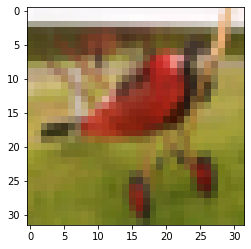

In [9]:
# plt.imshow(img0[0,:,:], cmap = 'gray')
plt.imshow(img0.permute(1,2,0))

In [10]:
print(*dataset[0]) #ese por al inicio separa las tuplas

tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

## Train, validation and test set


**Creamos el validation set**

In [11]:
train_ds, val_ds = random_split(dataset, lengths=[40000, 10000])

Miramos las dimensiones de los datasets de validación y entrenamiento.

In [12]:
len(train_ds), len(val_ds)

(40000, 10000)

## Dataloaders

In [13]:
from torch.utils.data.dataloader import DataLoader

In [14]:
train_dl = DataLoader(train_ds, batch_size=100, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=100, shuffle=True)

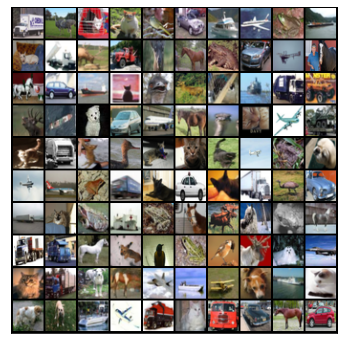

In [15]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=10).permute(1, 2, 0))
        break
show_batch(val_dl)

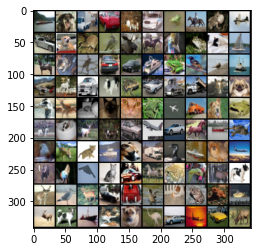

In [16]:
for images, labels in val_dl:
  plt.imshow(make_grid(images, nrow=10).permute(1,2,0))
  break

## Convolución

La convolución no es nada más ni nada menos que un filtro que se aplica a la imagen. A este filtro se le denomida **kernel** el cual es un tensor de 2 dimensiones, alto y ancho. 

lo que hace este kernel es tomar una parte de la imagen, de la misma dimensión que el kernel y hacer multiplicación uno a uno, es decir, por el elmento en la misma posición (como se hace la suma de matrices, pero con la multiplicación)

la convolución se ve de la siguiente manera:

<img src="https://miro.medium.com/max/1070/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif" style="max-width:400px;">

In [17]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [18]:
#aplicamos la función a un ejemplo
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

### Material complementario

Checking out the following articles to gain a better understanding of convolutions:

1. [Intuitively understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1) by Irhum Shafkat
2. [Convolutions in Depth](https://sgugger.github.io/convolution-in-depth.html) by Sylvian Gugger (this article implements convolutions from scratch)

### construimos una pequeña red convolucional

In [19]:
simple_model = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3, stride = 1, padding = 1),
    nn.MaxPool2d(2,2)
)

Ahora entrenamos un poco un pequeño batch del set de entrenamiento.

El modelo lo que hará es tomar las imágenes que son de 32x32, y le aplicará una convolución con un kernel de 3x3, lo que producirá un resultado de 32x32 (porque estamos añaniendo un padding de 1, lo que nos da una imagen de 34x34, y aplicando la convolución 34-3+1 = 32 *filas y columnas*). Y como le indicamos al modelo que genere tres output chanels, entonces habrá ocho filtros.

Luego aplicamos un max-pool a la imagen resultantes, lo que nos producirá una imagen de 15x15

In [20]:
for images, label in train_dl:
  print('images shapes: ', images.shape)
  out = simple_model(images)
  print('output shape: ', out.shape)
  break

images shapes:  torch.Size([100, 3, 32, 32])
output shape:  torch.Size([100, 8, 16, 16])


Al resultado anterior (8x16x16) lo llamamos **feature map** dado que ya no representa en sí una imagen en los colores primarios (R, G, B), si no un conjunto de características como por ejemplo, margenes, triángulos, etc.

## Modelo

The Conv2d layer transforms a 3-channel image to a 16-channel feature map, and the MaxPool2d layer halves the height and width. The feature map gets smaller as we add more layers, until we are finally left with a small feature map, which can be flattened into a vector. We can then add some fully connected layers at the end to get vector of size 10 for each image.

<img src = 'https://i.imgur.com/KKtPOKE.png'>


In [21]:
#arquitectura del modelo
model = nn.Sequential(
  nn.Conv2d(3, 32, kernel_size=3, padding=1),
  nn.ReLU(),
  nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
  nn.ReLU(),
  nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

  nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
  nn.ReLU(),
  nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
  nn.ReLU(),
  nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

  nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
  nn.ReLU(),
  nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
  nn.ReLU(),
  nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

  nn.Flatten(), 
  nn.Linear(256*4*4, 1024),
  nn.ReLU(),
  nn.Linear(1024, 512),
  nn.ReLU(),
  nn.Linear(512, 10)
)

Exploramos un poco los datos:

In [22]:
#primera capa
print(model[0])
print(model[0].weight.shape)

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([32, 3, 3, 3])


Interpretamos el anterior resultado de la siguiente manera:
- 32: número de filtros resultantes
- 3: número de inputs que le llegan al kernel
- 3,3: la dimensión del kernel

In [23]:
for images, label in train_dl:
  print('images shapes: ', images.shape)
  out = model(images)
  print('output shape: ', out.shape)
  print('out[0]: ', out[0])
  break

images shapes:  torch.Size([100, 3, 32, 32])
output shape:  torch.Size([100, 10])
out[0]:  tensor([ 0.0364,  0.0378,  0.0029,  0.0416, -0.0121,  0.0233,  0.0388,  0.0285,
         0.0348, -0.0260], grad_fn=<SelectBackward>)


In [24]:
list(model.parameters())[0].shape, list(model.parameters())[1].shape

(torch.Size([32, 3, 3, 3]), torch.Size([32]))

## GPU config

In [25]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Definimos ahora una varible en donde almacenemos el estado del **acelerador** para el entrenamiento del modelo.

In [26]:
device = get_default_device()
device

device(type='cuda')

Ahora para comenzar a entrenar el modelo necesitamos:
- Mover el train set y el validation set a la memoria GPU, para ello entonces utilizamos


```python
DeviceDataLoader
```

- Despues pasamos a la memoria el **model** con 


```python
to_device()

```






##Definición formal del modelo

In [27]:
#primero las métricas y funciones para el entrenamiento y testeo del modelo
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [28]:
#definición de la red convolucional
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)
model = Cifar10CnnModel()

Pasamos a la GPU los datasets y el modelo

In [29]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

## Train Model

In [30]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

**Definimos las funciones de evalución y entrenamiento; evaluate and fit**

In [31]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

**Movemos el modelo a la GPU**

In [32]:
#pasamos el modelo
model = to_device(Cifar10CnnModel(), device)

In [34]:
evaluate(model, val_dl)

{'val_acc': 0.101500004529953, 'val_loss': 2.302806854248047}

**Definimos los hiperparámetros del modelo**

In [36]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

**Entrenamos por 10 epochs**

In [37]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 2.0027, val_loss: 1.5851, val_acc: 0.4045
Epoch [1], train_loss: 1.3863, val_loss: 1.2058, val_acc: 0.5599
Epoch [2], train_loss: 1.1098, val_loss: 1.0410, val_acc: 0.6307
Epoch [3], train_loss: 0.9173, val_loss: 0.9159, val_acc: 0.6756
Epoch [4], train_loss: 0.7552, val_loss: 0.8298, val_acc: 0.7142
Epoch [5], train_loss: 0.6297, val_loss: 0.8374, val_acc: 0.7158
Epoch [6], train_loss: 0.5071, val_loss: 0.8140, val_acc: 0.7307
Epoch [7], train_loss: 0.3974, val_loss: 0.8466, val_acc: 0.7347
Epoch [8], train_loss: 0.3017, val_loss: 0.9366, val_acc: 0.7409
Epoch [9], train_loss: 0.2306, val_loss: 1.0546, val_acc: 0.7243


**Graficamos el performans que está teniendo la red**

In [38]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

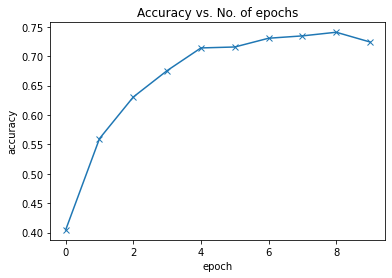

In [39]:
plot_accuracies(history)

In [40]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

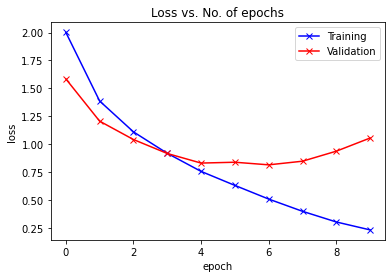

In [41]:
plot_losses(history)

In [44]:
history += fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 0.1756, val_loss: 1.1924, val_acc: 0.7264
Epoch [1], train_loss: 0.1223, val_loss: 1.4179, val_acc: 0.7136
Epoch [2], train_loss: 0.1206, val_loss: 1.3902, val_acc: 0.7202
Epoch [3], train_loss: 0.0952, val_loss: 1.4702, val_acc: 0.7263
Epoch [4], train_loss: 0.1134, val_loss: 1.5970, val_acc: 0.7170
Epoch [5], train_loss: 0.0840, val_loss: 1.5716, val_acc: 0.7211
Epoch [6], train_loss: 0.0789, val_loss: 1.4350, val_acc: 0.7303
Epoch [7], train_loss: 0.0850, val_loss: 1.6400, val_acc: 0.7279
Epoch [8], train_loss: 0.0731, val_loss: 1.6657, val_acc: 0.7237
Epoch [9], train_loss: 0.0752, val_loss: 1.5553, val_acc: 0.7271


## Test set

In [46]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [45]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: airplane


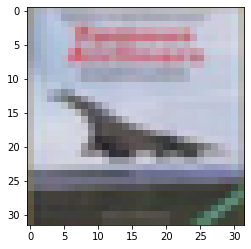

In [47]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))